# Data cleaning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/imdb_movies.csv")
df.sample(5)

FileNotFoundError: ignored

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/imdb_movies.csv")
df.sample(5)

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
4109,Taurus,11/18/2022,70.0,"Drama, Music",A rising but troubled musician searches for th...,"Machine Gun Kelly, Cole, Maddie Hasson, Ilana,...",Taurus,Released,English,111000000.0,395069158.8,US
5791,A Dirty Shame,09/24/2004,54.0,Comedy,Sylvia Stickles runs a convenience store with ...,"Tracey Ullman, Sylvia Stickles, Johnny Knoxvil...",A Dirty Shame,Released,English,15000000.0,1914166.0,US
2666,47 Ronin,01/16/2014,62.0,"Drama, Action, Fantasy","Kai—an outcast—joins Oishi, the leader of 47 o...","Keanu Reeves, Kai, Hiroyuki Sanada, Kuranosuke...",47 Ronin,Released,English,175000000.0,151716815.0,AU
786,The Grandmother,04/06/2022,59.0,"Drama, Horror","Susana leaves her life in Paris, where she wor...","Almudena Amor, Susana, Vera Valdez, Pilar, Kar...",La abuela,Released,"Spanish, Castilian",3749231.0,1817696.0,FR
2895,Leatherface,10/20/2017,55.0,"Horror, Thriller, Mystery",A young nurse is kidnapped by a group of viole...,"Stephen Dorff, Texas Ranger Hal Hartman, Vanes...",Leatherface,Released,English,2200000.0,1476843.0,US


In [ ]:
print(df.isnull().sum())
df.dropna(inplace=True)

names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64


In [ ]:
duplicates = df[df.duplicated(subset=['names', 'date_x'], keep=False)]
duplicates

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
95,Scream,01/13/2022,67.0,"Horror, Mystery, Thriller",Twenty-five years after a streak of brutal mur...,"Melissa Barrera, Sam Carpenter, Mason Gooding,...",Scream,Released,English,24000000.0,1.388748e+08,AU
96,Scream,01/13/2022,67.0,"Horror, Mystery, Thriller",Twenty-five years after a streak of brutal mur...,"Melissa Barrera, Sam Carpenter, Mason Gooding,...",Scream,Released,English,15000000.0,1.730466e+08,AU
109,The Ten Commandments,12/12/1958,78.0,"Drama, History","Escaping death, a Hebrew infant is raised in a...","Charlton Heston, Moses, Yul Brynner, Rameses, ...",The Ten Commandments,Released,English,13500000.0,8.543393e+07,AU
110,The Ten Commandments,12/12/1958,78.0,"Drama, History","Escaping death, a Hebrew infant is raised in a...","Charlton Heston, Moses, Yul Brynner, Rameses, ...",The Ten Commandments,Released,English,10000000.0,1.051907e+06,AU
169,The Lost City,03/30/2022,66.0,"Action, Adventure, Comedy",Reclusive author Loretta Sage writes about exo...,"Sandra Bullock, Loretta Sage / Angela, Channin...",The Lost City,Released,English,74000000.0,1.829220e+08,AU
...,...,...,...,...,...,...,...,...,...,...,...,...
9543,Pinocchio,10/11/2002,58.0,"Comedy, Family, Fantasy",Roberto Benigni adapts the classic children's ...,"Roberto Benigni, Pinocchio, Nicoletta Braschi,...",Pinocchio,Released,Italian,45000000.0,3.168181e+07,IT
9544,Pinocchio,10/11/2002,58.0,"Comedy, Family, Fantasy",Roberto Benigni adapts the classic children's ...,"Roberto Benigni, Pinocchio, Nicoletta Braschi,...",Pinocchio,Released,Italian,13200000.0,3.036038e+07,IT
9545,Pinocchio,10/11/2002,58.0,"Comedy, Family, Fantasy",Roberto Benigni adapts the classic children's ...,"Roberto Benigni, Pinocchio, Nicoletta Braschi,...",Pinocchio,Released,Italian,2289247.0,8.430000e+07,IT
9642,Alice in Wonderland,08/13/1999,63.0,"Fantasy, Family",Alice follows a white rabbit down a rabbit-hol...,"Tina Majorino, Alice, Robbie Coltrane, Tweedle...",Alice in Wonderland,Released,English,200000000.0,1.025491e+09,AU


In [ ]:
df = df.drop_duplicates(subset=['names', 'date_x'])

In [ ]:
duplicates = df[df.duplicated(subset=['names','budget_x', 'revenue'], keep=False)]
duplicates

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
11,The Exorcist,11/02/2022,55.0,Horror,"Ophelia, a young nun recently arriving in the ...","María Evoli, Ofelia, Diana Bracho, , Tina Rome...",La Exorcista,Released,"Spanish, Castilian",12000000.0,428214478.0,MX
83,Prey,08/05/2022,78.0,"Thriller, Action, Science Fiction","When danger threatens her camp, the fierce and...","Amber Midthunder, Naru, Dakota Beavers, Taabe,...",Prey,Released,English,65000000.0,0.0,AU
95,Scream,01/13/2022,67.0,"Horror, Mystery, Thriller",Twenty-five years after a streak of brutal mur...,"Melissa Barrera, Sam Carpenter, Mason Gooding,...",Scream,Released,English,24000000.0,138874789.0,AU
105,Smile,09/23/2022,68.0,"Horror, Mystery, Thriller","After witnessing a bizarre, traumatic incident...","Sosie Bacon, Dr. Rose Cotter, Kyle Gallner, Jo...",Smile,Released,English,17000000.0,216049734.0,AU
109,The Ten Commandments,12/12/1958,78.0,"Drama, History","Escaping death, a Hebrew infant is raised in a...","Charlton Heston, Moses, Yul Brynner, Rameses, ...",The Ten Commandments,Released,English,13500000.0,85433929.0,AU
...,...,...,...,...,...,...,...,...,...,...,...,...
9986,The Bodyguard,01/21/2004,59.0,"Action, Comedy",A professional bodyguard who failed to protect...,"Petchtai Wongkamlao, Wongkom, Piphat Apiraktan...",บอดี้การ์ดหน้าเหลี่ยม,Released,Thai,25000000.0,411006740.0,TH
10041,Prey,10/13/2016,57.0,"Horror, Thriller, Comedy",A zoo veterinarian gets caught up in a grisly ...,"Sophie van Winden, Lizzy, Julian Looman, Dave,...",Prooi,Released,"Dutch, Flemish",65000000.0,0.0,NL
10075,The Hunchback of Notre Dame,12/29/1939,73.0,"Drama, Romance, Horror","Paris, France, 1482. Frollo, Chief Justice of ...","Charles Laughton, The Hunchback Quasimodo, Ced...",The Hunchback of Notre Dame,Released,English,100000000.0,325500000.0,US
10153,Payback,02/05/2021,60.0,"Crime, Drama, Thriller","Mike Markovich, a young stockbroker at a Mob-c...","Matt Levett, Mike Markovich, Toby Leonard Moor...",Payback,Released,English,50000000.0,161626121.0,US


In [ ]:
df = df.drop_duplicates(subset=["names",'budget_x', 'revenue'])

In [ ]:
zero = df[df['score'] == 0]
zero

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
117,Fast X,05/19/2023,0.0,"Action, Crime, Thriller",Over many missions and against impossible odds...,"Vin Diesel, Dominic Toretto, Michelle Rodrigue...",Fast X,Post Production,English,340000000.0,0.0,US
216,The Little Mermaid,05/26/2023,0.0,"Adventure, Family, Fantasy, Romance","The youngest of King Triton’s daughters, and t...","Halle Bailey, Ariel, Jonah Hauer-King, Prince ...",The Little Mermaid,Post Production,English,205000000.0,178359863.0,US
229,Transformers: Rise of the Beasts,06/09/2023,0.0,"Action, Adventure, Science Fiction",A ‘90s globetrotting adventure that introduces...,"Anthony Ramos, Noah, Dominique Fishback, Elena...",Transformers: Rise of the Beasts,Post Production,English,200000000.0,1240261.6,US
231,Spider-Man: Across the Spider-Verse,06/02/2023,0.0,"Animation, Action, Adventure, Science Fiction","After reuniting with Gwen Stacy, Miles Morales...","Shameik Moore, Miles Morales / Spider-Man (voi...",Spider-Man: Across the Spider-Verse,Post Production,English,264940000.0,175269998.8,US
373,Barbie,07/21/2023,0.0,Comedy,To live in Barbie Land is to be a perfect bein...,"Margot Robbie, Barbie, Ryan Gosling, Ken, Amer...",Barbie,Post Production,English,175000000.0,178359863.0,US
...,...,...,...,...,...,...,...,...,...,...,...,...
9747,Step Up Love Story: Double Love,05/10/2019,0.0,Comedy,After three years of marriage and a bit more k...,"Hikaru Aoyama, Yura Onoda, Tama Mizuki, Naomi ...",映画版 ふたりエッチ ダブル・ラブ,Released,Japanese,264940000.0,175269998.8,JP
9769,Dinner,04/06/2023,0.0,"Thriller, Horror",Johnny is extremely nervous to meet his girlfr...,"Keegan McLean deWitt, Johnny, Fabiola De Viver...",Dinner,Released,English,170000000.0,178359863.0,CA
9776,Delicious Sisters,12/19/2018,0.0,Romance,Hyun-ji and Jin-hee are university friends. On...,"Yoo Sul-young, , Kang Jae-hee, , Tae Bong, , S...",맛있는누나들,Released,Korean,181600000.0,175269998.8,KR
9877,Detective Conan: Haibara Ai Monogatari ~Kuroga...,01/06/2023,0.0,Animation,We don't have an overview translated in Englis...,"Minami Takayama, Conan Edogawa (voice), Megumi...",名探偵コナン 灰原哀物語～黒鉄のミステリートレイン～,Released,Japanese,131600000.0,178359863.0,JP


In [ ]:
df = df[df['score'] != 0]

In [ ]:
df.shape

(9500, 12)

In [ ]:
zero_budget_rows = df[df['budget_x'] == 0]
zero_revenue_rows = df[df['revenue'] == 0]

print("Rows with zero budget:")
zero_budget_rows

print("Rows with zero revenue:")
zero_revenue_rows

Rows with zero budget:
Rows with zero revenue:


,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
83,Prey,08/05/2022,78.0,"Thriller, Action, Science Fiction","When danger threatens her camp, the fierce and...","Amber Midthunder, Naru, Dakota Beavers, Taabe,...",Prey,Released,English,65000000.0,0.0,AU
242,Hocus Pocus 2,09/30/2022,74.0,"Fantasy, Comedy, Family",29 years since the Black Flame Candle was last...,"Bette Midler, Winifred Sanderson, Sarah Jessic...",Hocus Pocus 2,Released,English,40000000.0,0.0,AU
429,Emancipation,12/02/2022,80.0,Drama,Inspired by the gripping true story of a man w...,"Will Smith, Peter, Ben Foster, Jim Fassel, Cha...",Emancipation,Released,English,120000000.0,0.0,US
439,Terrifier,03/15/2016,66.0,"Horror, Thriller","On Halloween night, a young woman finds hersel...","David Howard Thornton, Art the Clown, Jenna Ka...",Terrifier,Released,English,35000.0,0.0,US
635,Extraction,04/24/2020,73.0,"Drama, Action, Thriller","Tyler Rake, a fearless mercenary who offers hi...","Chris Hemsworth, Tyler Rake, Rudhraksh Jaiswal...",Extraction,Released,English,65000000.0,0.0,AU
717,Army of the Dead,05/21/2021,63.0,"Action, Crime, Horror, Thriller","Following a zombie outbreak in Las Vegas, a gr...","Dave Bautista, Scott Ward, Ella Purnell, Kate ...",Army of the Dead,Released,English,90000000.0,0.0,AU
1266,Lady and the Tramp,02/22/1956,71.0,"Family, Animation, Romance","Lady, a golden cocker spaniel, meets up with a...","Barbara Luddy, Lady (voice), Larry Roberts, Tr...",Lady and the Tramp,Released,English,60000000.0,0.0,AU
1421,Amina,11/04/2021,65.0,"War, History, Drama","In 16th-century Zazzau, now Zaria, Nigeria, Am...","Lucy Ameh, Amina, Ali Nuhu, Danjuma, Clarion C...",Amina,Released,English,250000.0,0.0,US
1993,6 Underground,12/13/2019,63.0,"Action, Comedy, Thriller","After faking his death, a tech billionaire rec...","Ryan Reynolds, One, Mélanie Laurent, Two, Manu...",6 Underground,Released,English,150000000.0,0.0,AU
2028,Greyhound,07/10/2020,74.0,"War, Action, Drama",A first-time captain leads a convoy of allied ...,"Tom Hanks, Commander Krause, Stephen Graham, C...",Greyhound,Released,English,50300000.0,0.0,AU


In [ ]:
df = df[(df['budget_x'] != 0) & (df['revenue'] != 0)]

In [ ]:
df['ROB'] = df['revenue'] / df['budget_x']

In [ ]:
condition = df[df["budget_x"]<10000]
condition

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,ROB
192,20th Century Girl,10/06/2022,83.0,"Romance, Drama",Yeon-du asks her best friend Bora to collect a...,"Kim You-jung, Na Bo-ra, Byeon Woo-seok, Poong ...",20세기 소녀,Released,Korean,119.0,77132590.4,KR,6.481730e+05
318,The Good Neighbor,09/01/2022,71.0,Thriller,"A nightmarish evening unfolds for David, a for...","Jonathan Rhys Meyers, Robert, Luke Kleintank, ...",The Good Neighbor,Released,English,105.0,94909.0,AU,9.038952e+02
2349,The Platform,03/20/2020,70.0,"Drama, Science Fiction, Thriller","A mysterious place, an indescribable prison, a...","Iván Massagué, Goreng, Antonia San Juan, Imogu...",El hoyo,Released,"Spanish, Castilian",600.0,214883443.8,AU,3.581391e+05
2420,Love to Kill,11/18/1993,48.0,"Drama, Horror",A woman looks to a cop for help against her ab...,"Anthony Wong, Sam Wai Wong, Danny Lee Sau-Yin,...",虐之戀,Released,Cantonese,87.0,1442918.2,HK,1.658527e+04
2805,Down,02/01/2019,69.0,"Horror, Drama, Thriller",A pair of coworkers gets trapped in an elevato...,"Natalie Martinez, Jennifer, Matt Lauria, Guy, ...",Down,Released,English,1.0,257720413.2,US,2.577204e+08
2857,The Wailer,06/20/2006,69.0,Horror,"On their way to Mexico, six students are stran...","Vanessa Rice, Julie, John Patrick Jordan, Andr...",La llorona,Released,"Spanish, Castilian",250.0,170176556.2,US,6.807062e+05
2972,Primer,08/25/2005,68.0,"Science Fiction, Drama, Thriller",Friends and fledgling entrepreneurs invent a d...,"Shane Carruth, Aaron, David Sullivan, Abe, Cas...",Primer,Released,English,7000.0,545436.0,AU,7.791943e+01
3895,The Party at Kitty and Stud's,02/10/1970,32.0,"Comedy, Drama",Kitty and Stud are lovers. They enjoy a robust...,"Sylvester Stallone, Stud, Henrietta Holm, Kitt...",The Party at Kitty and Stud's,Released,English,5000.0,1240261.6,US,2.480523e+02
3917,Dragon Ball Z: The Fall of Men,10/13/2015,60.0,"Action, Adventure",The World isn't like it's supposed to be. Some...,"Benjamin Hubert, Trunks, Aurélie Dujarrier, Bu...",Dragon Ball Z: The Fall of Men,Released,English,9662.0,22840186.8,US,2.363919e+03
4459,Nice Sister-In-Law,11/19/2015,52.0,"Romance, Drama",Ha-yeong is a successful psychologist. One day...,"Kang Eun-hye, Ha-yeong, Kang Sung-pil, Woo-seo...",착한 처제,Released,Korean,2000.0,8000.0,KR,4.000000e+00


In [ ]:
df = df[(df["budget_x"] > 10000)]

In [ ]:
df['year'] = pd.to_datetime(df['date_x']).dt.year
df['month'] = pd.to_datetime(df['date_x']).dt.month

In [ ]:
df = df.drop(['date_x'], axis=1)

In [ ]:
df['budget_in_mio'] = df['budget_x']/1000000
df['revenue_in_mio'] = df['revenue']/1000000

In [ ]:
df = df.drop(['budget_x','revenue'], axis=1)

In [ ]:
df.sample(5)

,names,score,genre,overview,crew,orig_title,status,orig_lang,country,ROB,year,month,budget_in_mio,revenue_in_mio
9225,The Painted Veil,72.0,"Romance, Drama",A British medical doctor fights a cholera outb...,"Edward Norton, Dr. Walter Fane, Naomi Watts, K...",The Painted Veil,Released,English,US,0.779319,2006,12,19.4,15.118795
3728,Pokémon: Lucario and the Mystery of Mew,69.0,"Family, Adventure, Animation, Fantasy, Action,...","In the legendary past, before Poké Balls were ...","Rica Matsumoto, Satoshi (voice), Ikue Otani, P...",劇場版ポケットモンスター アドバンスジェネレーション ミュウと波導の勇者 ルカリオ,Released,Japanese,AU,3.888448,2006,8,94.0,365.514110
6151,The Perfect Date,65.0,"Romance, Comedy",No beau? No problem! To earn money for college...,"Noah Centineo, Brooks Rattigan, Laura Marano, ...",The Perfect Date,Released,English,AU,4.735013,2019,4,81.0,383.536021
4546,Horns,63.0,"Drama, Fantasy, Thriller",In the aftermath of his girlfriend's mysteriou...,"Daniel Radcliffe, Ignatius Perrish, Juno Templ...",Horns,Released,English,AU,1.505631,2015,1,139.0,209.282732
9751,Three O'Clock High,69.0,Comedy,Nerdy high schooler Jerry Mitchell is assigned...,"Casey Siemaszko, Jerry Mitchell, Annie Ryan, F...",Three O'Clock High,Released,English,US,0.614310,1987,10,6.0,3.685862


# Describing and visualization

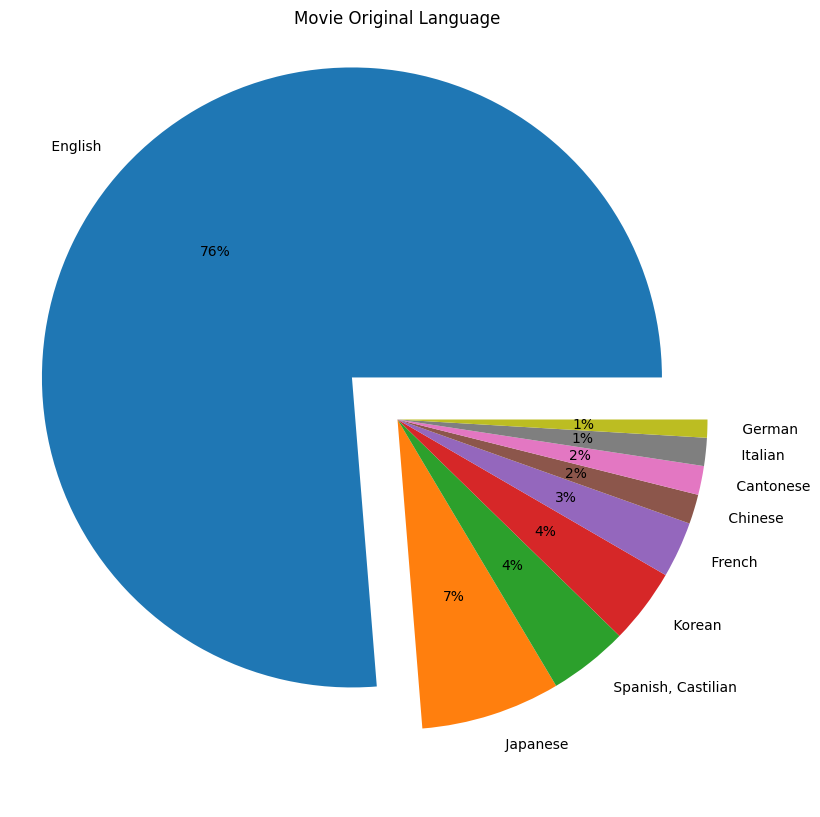

In [ ]:
v= df["orig_lang"].value_counts().index.tolist()[0:9]
w=df["orig_lang"].value_counts().unique()[0:9]
myexplode = [0.2, 0, 0, 0,0,0,0,0,0]
plt.figure(figsize=(10,15))
plt.title('Movie Original Language')
plt.pie(w, labels = v, explode = myexplode,autopct="%0.0f%%")
plt.show()

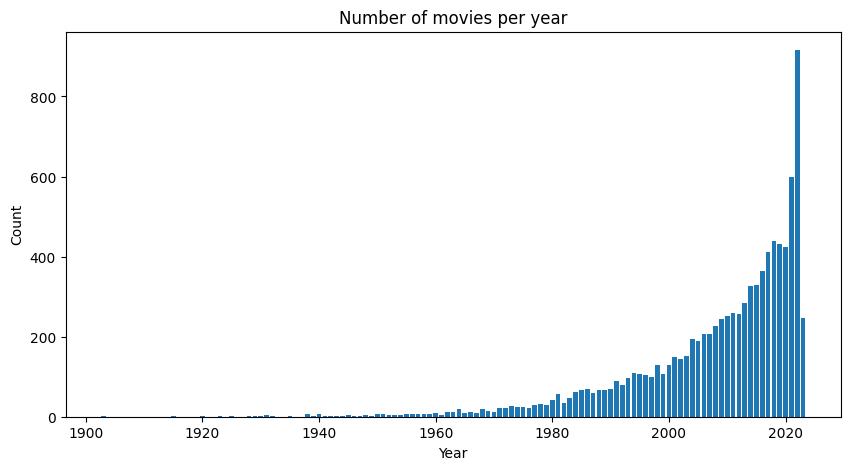

In [ ]:
year_counts = df['year'].value_counts()
sorted_year_counts = year_counts.sort_index()

plt.figure(figsize=(10, 5))
plt.bar(sorted_year_counts.index, sorted_year_counts.values)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Number of movies per year')

plt.show()

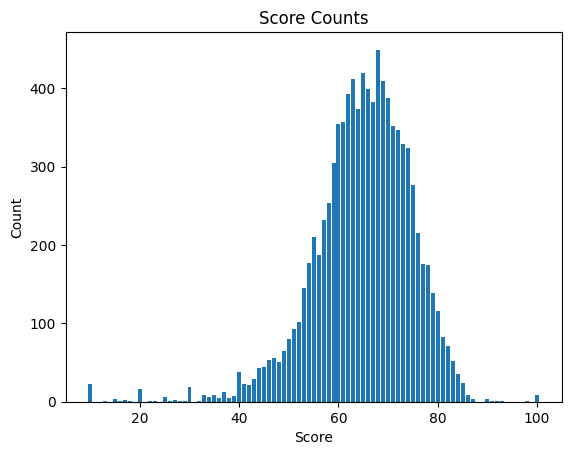

In [ ]:
score_counts = df['score'].value_counts()
sorted_scores = score_counts.sort_index()

plt.bar(sorted_scores.index, sorted_scores.values)
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Score Counts')
plt.show()

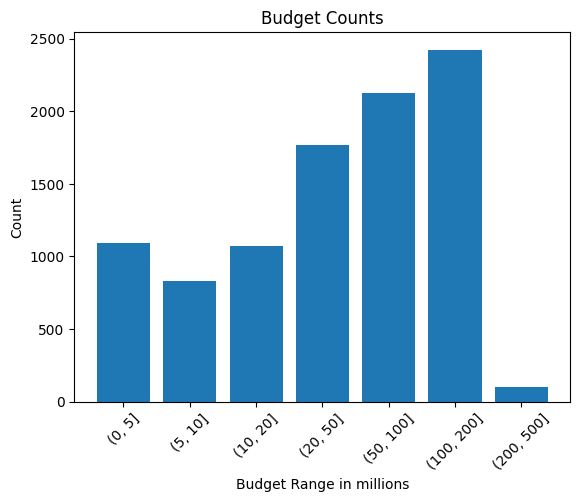

In [ ]:
bins = [0,5, 10, 20, 50, 100, 200, 500]


budget_counts = pd.cut(df['budget_in_mio'], bins).value_counts().sort_index()

plt.bar(budget_counts.index.astype(str), budget_counts.values)

plt.xlabel('Budget Range in millions')
plt.ylabel('Count')
plt.title('Budget Counts')
plt.xticks(rotation=45)
plt.show()


In [ ]:
mean_by_year = df.groupby('year')[['revenue_in_mio', 'budget_in_mio']].mean()
mean_by_year

,revenue_in_mio,budget_in_mio
year,,
1903,524.759370,106.400000
1915,16.891011,10.000000
1920,0.008811,0.018000
1923,1.500000,0.121000
1925,4.522550,4.644800
...,...,...
2019,304.144011,73.768362
2020,328.855102,81.296329
2021,346.087462,82.560018


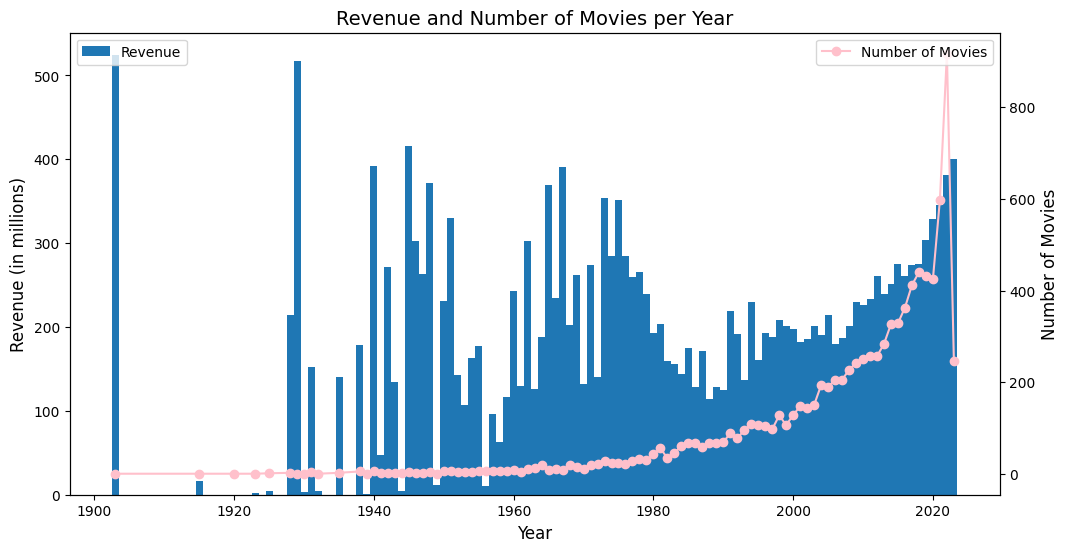

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first graph as a bar chart
ax1.bar(mean_by_year.index, mean_by_year.revenue_in_mio, width=1, label='Revenue')
ax1.set_xlabel("Year", fontsize=12)
ax1.set_ylabel("Revenue (in millions)", fontsize=12)
ax1.set_title("Revenue and Number of Movies per Year", fontsize=14)

# Create a twin axes for the second graph
ax2 = ax1.twinx()

# Plot the second graph as a line chart
ax2.plot(sorted_year_counts.index, sorted_year_counts.values, marker='o', color='pink', label='Number of Movies')
ax2.set_ylabel('Number of Movies', fontsize=12)

# Set legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the combined chart
plt.show()

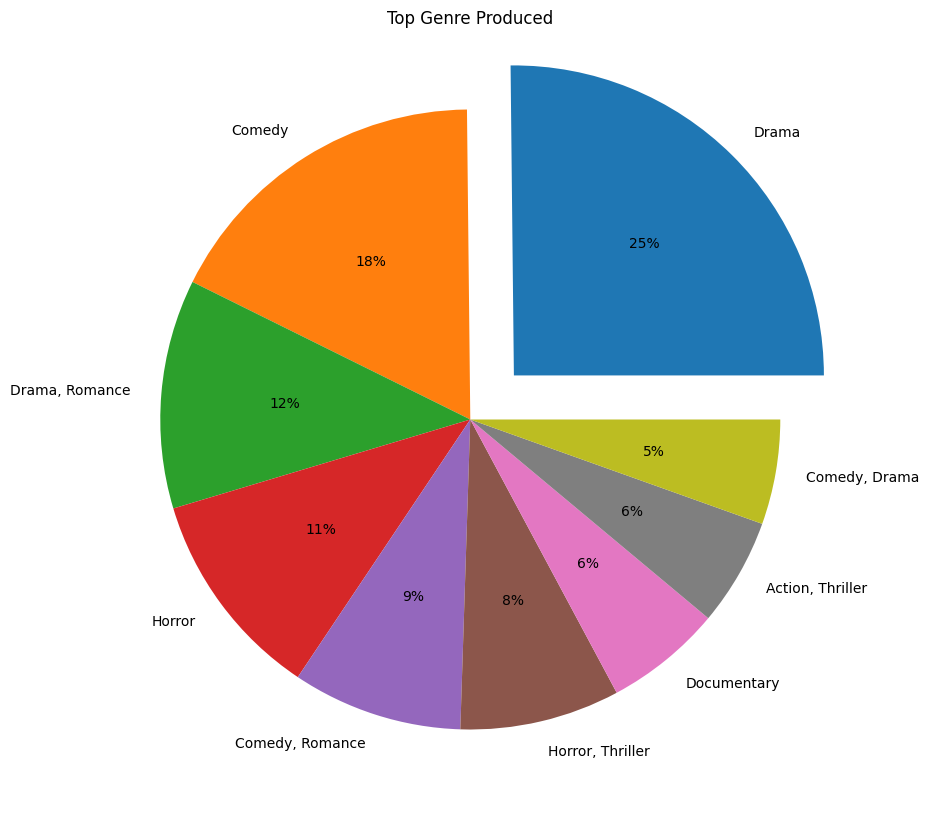

In [ ]:
v= df["genre"].value_counts().index.tolist()[0:9]
w=df["genre"].value_counts().unique()[0:9]
myexplode = [0.2, 0, 0, 0,0,0,0,0,0]
plt.figure(figsize=(10,15))
plt.title('Top Genre Produced')
plt.pie(w, labels = v, explode = myexplode,autopct="%0.0f%%")
plt.show()

<Axes: >

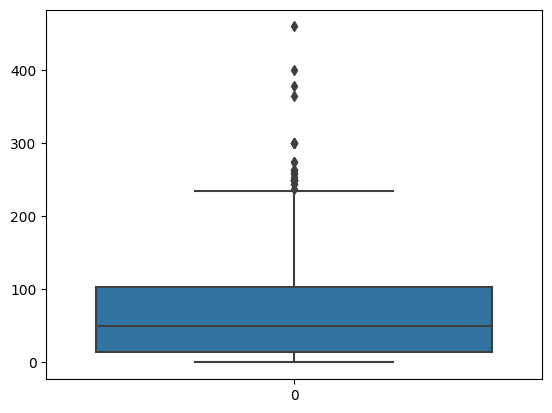

In [ ]:
sns.boxplot(df["budget_in_mio"])

<Axes: >

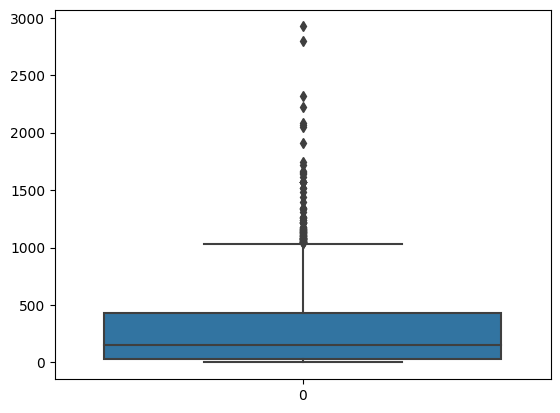

In [ ]:
sns.boxplot(df["revenue_in_mio"])

<Axes: >

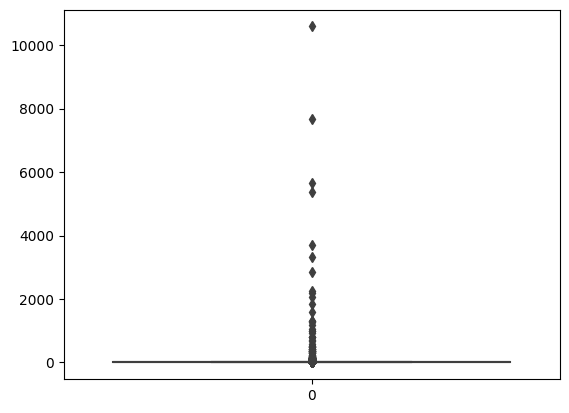

In [ ]:
sns.boxplot(df["ROB"])

In [ ]:
df.describe().T.style.format('{:,.2f}')

,count,mean,std,min,25%,50%,75%,max
score,"9,419.00",64.89,9.95,10.00,60.00,66.00,72.00,100.00
ROB,"9,419.00",13.08,179.02,0.00,1.54,3.36,5.87,"10,590.12"
year,"9,419.00","2,008.11",14.79,"1,903.00","2,002.00","2,013.00","2,019.00","2,023.00"
month,"9,419.00",6.67,3.54,1.00,3.00,7.00,10.00,12.00
budget_in_mio,"9,419.00",63.16,54.19,0.01,15.00,50.00,103.04,460.00
revenue_in_mio,"9,419.00",258.30,278.74,0.00,28.57,152.91,431.61,"2,923.71"


In [ ]:
top_10_ROB = df.sort_values("ROB", ascending=True)[-10:]
top_10_ROB

,names,score,genre,overview,crew,orig_title,status,orig_lang,country,ROB,year,month,budget_in_mio,revenue_in_mio
9590,Nameless Gangster,69.0,"Crime, Thriller",A corrupt customs official joins forces with a...,"Choi Min-sik, Choi Ik-hyun, Ha Jung-woo, Choi ...",범죄와의 전쟁,Released,Korean,KR,2061.763306,2012,2,0.125000,257.720413
8882,Hollywood Chainsaw Hookers,58.0,"Comedy, Horror",Los Angeles private eye Jack Chandler is hired...,"Gunnar Hansen, The Stranger, Linnea Quigley, S...",Hollywood Chainsaw Hookers,Released,English,US,2186.311530,1988,3,0.023000,50.285165
5709,Assassin's Creed: Embers,69.0,Animation,Taking place after the events of Assassin's Cr...,"Roger Craig Smith, Ezio Auditore da Firenze (v...",Assassin's Creed: Embers,Released,English,US,2252.156972,2011,11,0.100000,225.215697
150,Savage Salvation,66.0,Thriller,Newly engaged Shelby John and Ruby Red want a ...,"Jack Huston, Shelby John, Robert De Niro, Sher...",Savage Salvation,Released,English,US,2859.254541,2022,12,0.085645,244.880855
8818,A Grand Day Out,75.0,"Animation, Comedy, Family","Wallace and Gromit have run out of cheese, and...","Peter Sallis, Wallace (voice)",A Grand Day Out,Released,English,AU,3331.514382,2001,6,0.017300,57.635199
7250,Ferdinand the Bull,66.0,"Animation, Comedy, Family",This Oscar-winning short tells of a bull who p...,"Milt Kahl, Ferdinand (voice), Don Wilson, Narr...",Ferdinand the Bull,Released,English,US,3703.416885,1938,11,0.066260,245.388403
5603,Cashback,70.0,"Drama, Comedy","Ben is an art college student in London, whose...","Sean Biggerstaff, Ben, Emilia Fox, Sharon, Stu...",Cashback,Released,English,US,5372.086095,2004,10,0.040000,214.883444
3128,Inuyasha the Movie: Affections Touching Across...,77.0,"Action, Animation, Adventure, Fantasy",InuYasha is a half-demon who was trapped in th...,"Houko Kuwashima, Sango, Kumiko Watanabe, Shipp...",犬夜叉 時代を越える想い,Released,Japanese,JP,5663.421044,2001,12,0.010540,59.692458
5389,Mi Prima La Sexóloga,71.0,Comedy,A young man is afraid of asking for sex tips t...,"Stephanie Herela, Malena, Andrés Salvatierra, ...",Mi Prima La Sexóloga,Released,"Spanish, Castilian",MX,7669.043920,2016,7,0.015000,115.035659
278,Whisper,64.0,"Horror, Thriller",A young Nurse is assigned to look after a pati...,"Linda Louise Duan, Sam, Penelope Read, Dr. Car...",Whisper,Released,English,GB,10590.120020,2022,1,0.020000,211.802400


In [ ]:
Top_10_Revenue = df.sort_values("revenue_in_mio", ascending=True)[-10:]
Top_10_Revenue

,names,score,genre,overview,crew,orig_title,status,orig_lang,country,ROB,year,month,budget_in_mio,revenue_in_mio
2649,Franco Escamilla: Eavesdropping,87.0,Comedy,Franco Escamilla takes the stage in California...,"Franco Escamilla, Self",Franco Escamilla: Voyerista auditivo,Released,"Spanish, Castilian",MX,11.353940,2022,10,151.0,1714.444954
2156,BTS: Permission to Dance on Stage - LA,92.0,"Music, Documentary","Purple colors the city of Los Angeles, as BTS ...","Kim Nam-joon, Self, Kim Seok-jin, Self, Min Yo...",BTS: PERMISSION TO DANCE 온 스테이지 – LA,Released,Korean,KR,8.107688,2022,9,215.6,1748.017438
76,Spider-Man: No Way Home,80.0,"Action, Adventure, Science Fiction",Peter Parker is unmasked and no longer able to...,"Tom Holland, Peter Parker / Spider-Man, Zenday...",Spider-Man: No Way Home,Released,English,AU,9.550241,2021,12,200.0,1910.048245
104,Avengers: Infinity War,83.0,"Adventure, Action, Science Fiction",As the Avengers and their allies have continue...,"Robert Downey Jr., Tony Stark / Iron Man, Chri...",Avengers: Infinity War,Released,English,AU,6.827866,2018,4,300.0,2048.359754
943,Star Wars: The Force Awakens,73.0,"Adventure, Action, Science Fiction, Fantasy",Thirty years after defeating the Galactic Empi...,"Harrison Ford, Han Solo, Mark Hamill, Luke Sky...",Star Wars: The Force Awakens,Released,English,AU,8.441729,2015,12,245.0,2068.223624
4483,Louis Tomlinson: All of Those Voices,91.0,"Documentary, Music",Ditching the typical glossy sheen of celebrity...,"Louis Tomlinson, Self, Oliver Wright, Louis’ P...",Louis Tomlinson: All of Those Voices,Released,English,GB,11.643143,2023,3,178.8,2081.794006
309,Titanic,79.0,"Drama, Romance",101-year-old Rose DeWitt Bukater tells the sto...,"Leonardo DiCaprio, Jack Dawson, Kate Winslet, ...",Titanic,Released,English,AU,11.114928,1997,12,200.0,2222.985568
1,Avatar: The Way of Water,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,AU,5.036511,2022,12,460.0,2316.794914
230,Avengers: Endgame,83.0,"Adventure, Science Fiction, Action",After the devastating events of Avengers: Infi...,"Robert Downey Jr., Tony Stark / Iron Man, Chri...",Avengers: Endgame,Released,English,AU,6.986829,2019,4,400.0,2794.731755
68,Avatar,76.0,"Action, Adventure, Fantasy, Science Fiction","In the 22nd century, a paraplegic Marine is di...","Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar,Released,English,AU,12.336312,2009,12,237.0,2923.706026


In [ ]:
#Top 10 crew member with highest average movie score

from collections import defaultdict

total_scores = defaultdict(int)
counts = defaultdict(int)

for _, row in df.iterrows():
    crew_members = row['crew'].split(',')

    for member in crew_members:
        total_scores[member] += row['score']
        counts[member] += 1

average_scores = {crew: total_scores[crew]/counts[crew] for crew in total_scores}
top_crew = sorted(average_scores.items(), key=lambda x: x[1], reverse=True)[:10]
for crew, score in top_crew:
    print(crew, score)


 Hong Sae-hee 100.0
Rodrigo Noya 100.0
 Luis Cao 100.0
 Florencia Raggi 100.0
 Barbie Pucheta 100.0
 Fabio Alberti 100.0
Ye Seul 100.0
 Lee Sul-ah-I 100.0
Ha Yeon 100.0
 Elizabeth Tabish 100.0


In [ ]:
Worst_10_Revenue = df.sort_values("revenue_in_mio", ascending=False)[-10:]
Worst_10_Revenue

,names,score,genre,overview,crew,orig_title,status,orig_lang,country,ROB,year,month,budget_in_mio,revenue_in_mio
2377,A Serbian Film,55.0,"Crime, Horror, Thriller","Milos, a retired porn star, leads a normal fam...","Srđan Todorović, Miloš, Sergej Trifunović, Vuk...",Srpski film,Released,Serbian,US,0.000401,2011,5,3.840000,0.001541
1113,The Lion King 1½,66.0,"Family, Animation, Comedy, Action",Timon the meerkat and Pumbaa the warthog are b...,"Nathan Lane, Timon (voice), Ernie Sabella, Pum...",The Lion King 1½,Released,English,AU,0.000018,2004,2,80.017249,0.001465
4779,Skin Trade,62.0,"Thriller, Action, Drama",After his family is killed by a Serbian gangst...,"Dolph Lundgren, Nick Cassidy, Tony Jaa, Tony V...",Skin Trade,Released,English,AU,0.000138,2015,6,9.000000,0.001242
8662,The Big Brawl,61.0,"Action, Comedy",A young Asian American martial artist is force...,"Jackie Chan, Jerry Kwan, José Ferrer, Dominici...",The Big Brawl,Released,English,US,0.000037,1980,9,22.900000,0.000854
8374,Capricorn One,68.0,"Drama, Action, Thriller, Science Fiction",In order to protect the reputation of the Amer...,"Elliott Gould, Robert Caulfield, James Brolin,...",Capricorn One,Released,English,AU,0.000080,1978,7,5.000000,0.000401
2072,12 Angry Men,85.0,Drama,The defense and the prosecution have rested an...,"Martin Balsam, Juror 1, John Fiedler, Juror 2,...",12 Angry Men,Released,English,AU,0.001115,1957,10,0.340000,0.000379
9658,Empire Records,66.0,"Music, Comedy, Drama",The employees of an independent music store le...,"Anthony LaPaglia, Joe Reaves, Debi Mazar, Jane...",Empire Records,Released,English,AU,0.000008,1995,10,35.690381,0.000303
5481,The Pornographer,46.0,Drama,Jacques Laurent made pornographic films in the...,"Jean-Pierre Léaud, Jacques Laurent, Jérémie Re...",Le Pornographe,Released,French,FR,0.000020,2001,10,6.461099,0.000126
5455,The Walking Deceased,53.0,"Comedy, Horror",A group of survivors from all walks of the apo...,"Tim Ogletree, Green Bay, Troy Ogletree, Chicag...",The Walking Deceased,Released,English,US,0.000022,2015,3,2.000000,0.000043
1687,What Happened at the Carpenter's Shop,43.0,Romance,A rumour spread out all over the neighborhood....,"Tae Joo, , Ahn So-hee, , Min Do-yoon, , Gil Do...",목공소에서 생긴 일,Released,Korean,KR,0.000001,2020,3,5.503757,0.000007


<Axes: >

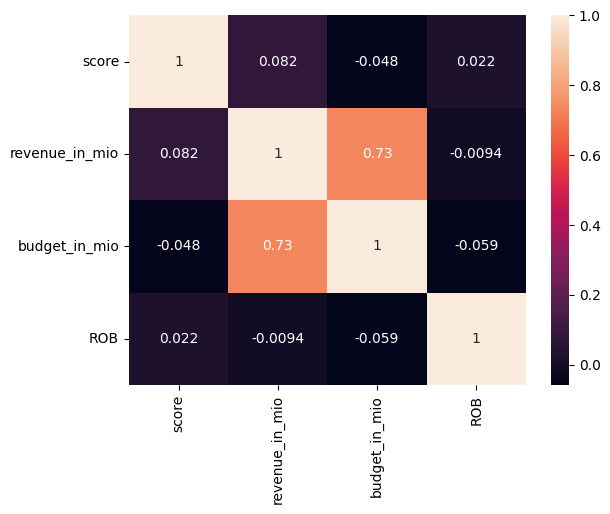

In [ ]:
corr = df[["score", "revenue_in_mio", "budget_in_mio","ROB"]].corr()
sns.heatmap(corr, annot=True)

# Modeling

### **Encoding and standardization**

In [ ]:
df['genre'] = df['genre'].apply(lambda x: str(x) if isinstance(x, str) else '')
df['crew'] = df['crew'].apply(lambda x: str(x) if isinstance(x, str) else '')
df['orig_lang'] = df['orig_lang'].apply(lambda x: str(x) if isinstance(x, str) else '')

X = df[['genre', 'crew', 'month','year','budget_in_mio','orig_lang']]
y = df['revenue_in_mio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

preprocessor = ColumnTransformer(transformers=[
    ('genre', OneHotEncoder(dtype=int, handle_unknown='ignore'), ['genre']),
    ('crew', OneHotEncoder(dtype=int, handle_unknown='ignore'), ['crew']),
    ('orig_lang', OneHotEncoder(dtype=int, handle_unknown='ignore'), ['orig_lang']),
    ('scaler', StandardScaler(), ['month', 'budget_in_mio','year'])
], remainder='passthrough')

## KNN - revenue

In [ ]:
# KNN model with hyperparameter tuning
model_knn = make_pipeline(
    preprocessor,
    GridSearchCV(KNeighborsRegressor(),
                 param_grid={'n_neighbors': range(5, 15)},
                 cv=5,
                 n_jobs=-1)
)

model_knn.fit(X_train, y_train)

print("Best parameters for KNN: ", model_knn.named_steps['gridsearchcv'].best_params_)
print("KNN model score: ", model_knn.score(X_test, y_test))

Best parameters for KNN:  {'n_neighbors': 14}
KNN model score:  0.5656740223618788


In [ ]:
# for gridsearch improvemwnt
model_knn = make_pipeline(
    preprocessor,
    GridSearchCV(KNeighborsRegressor(),
                 param_grid={'n_neighbors': range(10,20)},
                 cv=5,
                 n_jobs=-1)
)

model_knn.fit(X_train, y_train)

print("Best parameters for KNN: ", model_knn.named_steps['gridsearchcv'].best_params_)
print("KNN model score: ", model_knn.score(X_test, y_test))

Best parameters for KNN:  {'n_neighbors': 18}
KNN model score:  0.567643047842096


##Linear regression - revenue

In [ ]:
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score, mean_absolute_error
lm_pipe = make_pipeline(
    preprocessor,
    LinearRegression()
)
lm_pipe.fit(X_train, y_train)
train_pred = lm_pipe.predict(X_train)
test_pred = lm_pipe.predict(X_test)
RMSE_test = np.sqrt(mean_squared_error(y_test, test_pred))
RMSE_train= np.sqrt(mean_squared_error(y_train,train_pred))
print("RMSE Training Data = ", str(RMSE_train))
print("RMSE Test Data = ", str(RMSE_test))
print('-' * 50)
print('R-Squared value on train:', lm_pipe.score(X_train, y_train))
print('R-Squared value on test:', lm_pipe.score(X_test, y_test))

RMSE Training Data =  0.9637961705400977
RMSE Test Data =  1073.4187415916535
--------------------------------------------------
R-Squared value on train: 0.9999880601644816
R-Squared value on test: -13.919486927241062


## random forest- revenue

In [ ]:
# Random Forest with GridSearchCV for parameter tuning
rf_pipe_revenue = make_pipeline(
    preprocessor,
    RandomForestRegressor(random_state=0)
)

rf_pipe_revenue.fit(X_train, y_train)
print("Random Forest R-Squared on train set: ", rf_pipe_revenue.score(X_train, y_train))
print("Random Forest R-Squared on test set: ", rf_pipe_revenue.score(X_test, y_test))

Random Forest R-Squared on train set:  0.9447567136402389
Random Forest R-Squared on test set:  0.6182265504938655


## KNN and randomforest analysis on ROB

In [ ]:
df['genre'] = df['genre'].apply(lambda x: str(x) if isinstance(x, str) else '')
df['crew'] = df['crew'].apply(lambda x: str(x) if isinstance(x, str) else '')

X = df[['genre', 'crew', 'month', 'budget_in_mio']]
y = df['ROB']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

preprocessor = ColumnTransformer(transformers=[
    ('genre', OneHotEncoder(dtype=int, handle_unknown='ignore'), ['genre']),
    ('crew', OneHotEncoder(dtype=int, handle_unknown='ignore'), ['crew']),
    ('scaler', StandardScaler(), ['month', 'budget_in_mio'])
], remainder='passthrough')

In [ ]:
# KNN model
knn_pipe = make_pipeline(
    preprocessor,
    KNeighborsRegressor()
)

knn_params = {'kneighborsregressor__n_neighbors': range(1, 20)}

knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, n_jobs=-1)
knn_grid.fit(X_train, y_train)

print("Best parameters for KNN: ", knn_grid.best_params_)
print("KNN model score: ", knn_grid.score(X_test, y_test))

Best parameters for KNN:  {'kneighborsregressor__n_neighbors': 19}
KNN model score:  -0.07810282809907032


In [ ]:
# Random Forest
rf_pipe = make_pipeline(
    preprocessor,
    RandomForestRegressor(random_state=0)
)

rf_pipe.fit(X_train, y_train)
print("Random Forest score: ", rf_pipe.score(X_test, y_test))

Random Forest score:  -1.4880601849080541


# Use Random forest Model for prediction

In [ ]:
import ipywidgets as widgets
from IPython.display import display

genre_input = widgets.Text(placeholder='Enter a genre', description='Genre:', disabled=False)
crew_input = widgets.Text(placeholder='Enter a crew', description='Crew:', disabled=False)
month_input = widgets.IntSlider(value=12, min=1, max=12, description='Month:')
year_input = widgets.IntSlider(value=2034, min=2023, max=2123, description='Year:')
budget_input = widgets.IntSlider(value=300, min=0, max=500, description='Budget €m:')
orig_lang_input = widgets.Text(placeholder='Enter a language', description='Language:', disabled=False)

run_button = widgets.Button(description='Run Model')

def run_model(button):
    genre = genre_input.value
    crew = crew_input.value
    month = month_input.value
    year = year_input.value
    budget_in_mio = budget_input.value
    orig_lang = orig_lang_input.value

    new_data = pd.DataFrame({
        'genre': [genre],
        'crew': [crew],
        'month': [month],
        'year': [year],
        'budget_in_mio': [budget_in_mio],
        'orig_lang': [orig_lang]
    })

    predicted_revenue = rf_pipe_revenue.predict(new_data)

    budget_in_mio = new_data['budget_in_mio'].iloc[0]
    year = new_data['year'].iloc[0]
    month = new_data['month'].iloc[0]

    predicted_rob = predicted_revenue / budget_in_mio

    print(f"Predicted Revenue for {crew}'s {genre} movie in year {year} month {month}: ${predicted_revenue[0]:,.2f}")
    print(f"Predicted ROB for {crew}'s {genre} movie in year {year} month {month}: ${predicted_rob[0]:,.2f}")

run_button.on_click(run_model)

display(genre_input, crew_input, orig_lang_input, month_input, year_input, budget_input, run_button)

Text(value='', description='Genre:', placeholder='Enter a genre')

Text(value='', description='Crew:', placeholder='Enter a crew')

Text(value='', description='Language:', placeholder='Enter a language')

IntSlider(value=12, description='Month:', max=12, min=1)

IntSlider(value=2034, description='Year:', max=2123, min=2023)

IntSlider(value=300, description='Budget €m:', max=500)

Button(description='Run Model', style=ButtonStyle())

In [ ]:
pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.4/288.4 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.0/137.0 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 k

In [ ]:
import gradio as gr

def predict_revenue(genre, crew, month, year, budget_in_mio, orig_lang):
    # Create a DataFrame with the user input
    new_data = pd.DataFrame({
        'genre': [genre],
        'crew': [crew],
        'month': [month],
        'year': [year],
        'budget_in_mio': [budget_in_mio],
        'orig_lang': [orig_lang]
    })

    predicted_revenue = rf_pipe_revenue.predict(new_data)

    budget_in_mio = new_data['budget_in_mio'].iloc[0]
    year = new_data['year'].iloc[0]
    month = new_data['month'].iloc[0]

    predicted_rob = predicted_revenue / budget_in_mio

    return f"Predicted Revenue for {crew}'s {genre} movie in year {year} month {month}: ${predicted_revenue[0]:,.2f}\n" \
           f"Predicted ROB for {crew}'s {genre} movie in year {year} month {month}: ${predicted_rob[0]:,.2f}"

inputs = [
    gr.inputs.Textbox(label='Genre'),
    gr.inputs.Textbox(label='Crew'),
    gr.inputs.Slider(minimum=1, maximum=12, step=1, default=12, label='Month'),
    gr.inputs.Slider(minimum=1900, maximum=3000, step=1, default=2034, label='Year'),
    gr.inputs.Slider(minimum=0, maximum=500, step=1, default=300, label='Budget €m'),
    gr.inputs.Textbox(label='Language')
]

output = gr.outputs.Textbox(label='Prediction')

interface = gr.Interface(fn=predict_revenue, inputs=inputs, outputs=output, title='How does your next movie look like?', language='english')
interface.launch()

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:30: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:30: UserWarning: `numeric` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:89: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:93: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is de

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

# Use exsiting dataset for movie recomendation

In [ ]:
def search_movies(genre, year, content):
    matching_movies = []
    for index, row in df.iterrows():
        if str(year) in str(row['year']) and genre.lower() in row['genre'].lower() and content.lower() in row['overview'].lower():
            matching_movies.append((row['orig_title'], row['score']))
    return matching_movies

def format_movie_result(movie):
    title, score = movie
    return f"Title: {title}, Score: {score}"

def search_movies_interface(genre, year, content):
    result = search_movies(genre, year, content)
    if len(result) > 0:
        formatted_results = [format_movie_result(movie) for movie in result[:10]]
        return "You might be interested in:\n" + "\n".join(formatted_results)
    else:
        return "Sorry, your interest is not found."

inputs = [
    gr.inputs.Textbox(label='Genre'),
    gr.inputs.Textbox(label='Year'),
    gr.inputs.Textbox(label='Content')
]

output = gr.outputs.Textbox(label='Results')

interface = gr.Interface(fn=search_movies_interface, inputs=inputs, outputs=output, title='Movie Search')
interface.launch()

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:30: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:30: UserWarning: `numeric` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [ ]:
def search_movies(genre, year, crew):
    matching_movies = []
    for index, row in df.iterrows():
        if str(year) in str(row['year']) and genre.lower() in row['genre'].lower() and crew.lower() in row['crew'].lower():
            matching_movies.append((row['orig_title'], row['score']))
    return matching_movies

def format_movie_result(movie):
    title, score = movie
    return f"Title: {title}, Score: {score}"

def search_movies_interface(genre, year, crew):
    result = search_movies(genre, year, crew)
    if len(result) > 0:
        formatted_results = [format_movie_result(movie) for movie in result[:10]]
        return "You might be interested in:\n" + "\n".join(formatted_results)
    else:
        return "Sorry, your interest is not found."

inputs = [
    gr.inputs.Textbox(label='Genre'),
    gr.inputs.Textbox(label='Year'),
    gr.inputs.Textbox(label='Crew')
]

output = gr.outputs.Textbox(label='Results')

interface = gr.Interface(fn=search_movies_interface, inputs=inputs, outputs=output, title='Movie Search')
interface.launch()

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:30: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:30: UserWarning: `numeric` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>